Cargar las librerías y funciones

In [8]:
import numpy as np
import seaborn as sns

from scipy.stats import genpareto
from anomalydetector_evt.utils.grimshaw import grimshaw

In [33]:
from anomalydetector_evt.utils.pot import POT

Cargar los datos

In [15]:
init_level = 0.98
data = np.load('tests/example1.npy')
t = np.sort(data)[int(init_level * data.size)]
peaks = data[data>t] - t

In [16]:
gamma, sigma = grimshaw(peaks)

1.508101944184972e+16


<Axes: ylabel='Density'>

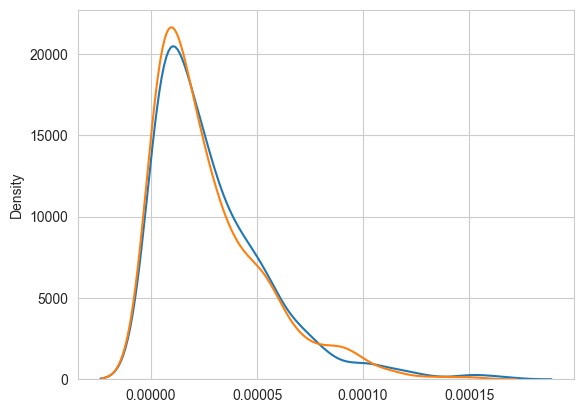

In [17]:
simulated = genpareto.rvs(c=gamma, loc=0, scale=sigma, size=len(peaks))
sns.set_style('whitegrid')  # Establece el estilo de seaborn
sns.kdeplot(peaks) 
sns.kdeplot(simulated)

In [26]:
#from utils.grimshaw import grimshaw

def calc_zq(q, gamma, sigma, n, Nt, t):

    zq = t + (sigma / gamma) * ((q * n/Nt)**(-gamma) - 1)

    return zq

def POT(data, q):


    # Calcular el umbral inicial
    t = np.sort(data)[int(q * data.size)]
    print(t)

    # Calcular los excesos X_i - t (peaks)
    peaks = data[data > t] - t

    # Ajustar una distribución pareto generalizada a los excesos
    gamma, sigma = grimshaw(peaks)

    # Calcular el cuantil
    n = len(data) # total de observaciones
    Nt = len(peaks) # total de excesos

    zq = calc_zq(q, gamma, sigma, n, Nt, t)

    return zq, t



In [34]:
POT(data, q=0.98)

NameError: name 'np' is not defined